In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import BaggingRegressor
from utilities import split

In [29]:
def Bagging_regression(df):
    #df = df.drop(columns=['Quarter end'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    X = df
    Y = X['Price']
    Y = Y[1:]
    
    #Getting Next Quarter %change of price 
    #This will be our target variable

    X = X[:-1]
    X = X.values
    Y = Y.values
    
    
    X_train, X_test, y_train, y_test = split( X, Y)
    X_train_means = np.mean(X_train, axis = 0)
    X_train_std = np.std(X_train, axis = 0)
    X_train_scaled = (X_train - X_train_means)/X_train_std
    
    #print(np.shape(X_train_scaled)[1])

    X_test_scaled = (X_test - X_train_means)/X_train_std
    # Import the model we are using

    reg = BaggingRegressor(n_estimators = 1000)
    reg.fit(X_train_scaled, y_train)
    # Train the model on training data
    # Use the forest's predict method on the test data
    predictions = reg.predict(X_test_scaled)
    
    return predictions,y_test

In [3]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

all_preds = {}
all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./All_Data/new_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels = Bagging_regression(df)
        #preds = np.reshape(preds,(8,))
        all_preds[str(filenames[i])] = preds
        all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [7]:
Predictions = pd.DataFrame.from_dict(all_preds, orient='index')
labels_df = pd.DataFrame.from_dict(all_labels, orient='index')
Predictions

,0,1,2,3,4,5,6,7
A_quarterly_financial_data.csv,0.044463,0.045412,0.041254,-0.001242,0.041307,-0.069996,0.082521,-0.029713
AMR_quarterly_financial_data.csv,0.013844,0.065751,0.076667,-0.044784,0.043861,0.076850,-0.065217,-0.070204
AAN_quarterly_financial_data.csv,0.002724,-0.009677,0.049479,0.003986,0.025584,0.050892,0.030014,0.018040
AAPL_quarterly_financial_data.csv,0.044161,0.100679,0.086473,0.066584,0.041170,0.085044,0.036605,-0.007833
ABMD_quarterly_financial_data.csv,0.064481,0.069184,0.104710,0.080137,0.071658,0.057740,0.071174,0.066816
ABT_quarterly_financial_data.csv,0.044845,0.017512,-0.109923,0.029325,0.016129,-0.175649,-0.037831,-0.058022
ADBE_quarterly_financial_data.csv,0.072568,0.064692,0.064107,0.088080,0.084227,0.075810,0.015917,0.042078
ADI_quarterly_financial_data.csv,0.033515,0.048947,0.027869,0.062002,-0.019663,0.031253,0.036747,0.034481
ADM_quarterly_financial_data.csv,0.029963,-0.011791,0.036647,0.053182,0.028574,0.029404,0.001037,0.004296
ADSK_quarterly_financial_data.csv,0.062582,0.041495,0.045127,0.002761,0.019910,-0.012006,0.013452,-0.048863


In [4]:
import matplotlib.pyplot as plt

def give_quarter_performance(Predictions,labels_df,quarter):
    Q = Predictions[quarter]
    Q_labels = labels_df[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[str(index)]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    final_df = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return final_df

def quarter_performance(Quarter_result):    
    portfolio_start = 30
    portfolio_end = 0
    for value in Quarter_result['Labels'].values:
        portfolio_end = portfolio_end + 1 + value
    
    perfomance = ((portfolio_end-portfolio_start)/portfolio_start)*100
    return perfomance
        
def total_performance(num_quarters,Predictions,labels_df):
    total_returns = 100
    q_turnouts = [100]
    q_pers = []
    for quarter in range(num_quarters):
        Q_result = give_quarter_performance(Predictions,labels_df,quarter)
        Q_per = quarter_performance(Q_result)
        
        total_returns = total_returns * (1+(Q_per/100))
        print('Quarter :'+str(quarter+1)+'\t Result :' +str(Q_per)+' %')
        q_turnouts.append(total_returns)
        q_pers.append(Q_per)
    
    compounded_result = total_returns-100
    q_avg_return = pow(total_returns/100, 1/num_quarters) - 1
    CAGR = pow(total_returns/100, 1/(num_quarters/4)) - 1
    
    print('Compounded Result :'+str(compounded_result)+str(' %'))
    print('Quarterly Compounded Growth Rate :', q_avg_return*100, '%')
    print('Annual Compounded Growth Rate :', CAGR*100, '%')
    print('Sharpe Ratio :', (q_avg_return*100/np.std(q_pers))*2)
    
    plt.figure(figsize=(10,5))
    plt.plot(q_turnouts)
    plt.ylabel('Portfolio Value')
    plt.xlabel('Quarters')
    plt.title('Bagging Regression Portfolio Performance')
    plt.show()

    

Quarter :1	 Result :7.308397976647095 %
Quarter :2	 Result :5.9942319994294735 %
Quarter :3	 Result :5.199800986937433 %
Quarter :4	 Result :4.0108577767992415 %
Quarter :5	 Result :5.538558786298798 %
Quarter :6	 Result :-4.503515714335873 %
Quarter :7	 Result :-1.682669329794777 %
Quarter :8	 Result :8.80291040005524 %
Compounded Result :34.17718428562955 %
Quarterly Compounded Growth Rate : 3.7432464364063556 %
Annual Compounded Growth Rate : 15.834875700554685 %
Sharpe Ratio : 1.7513873292712088


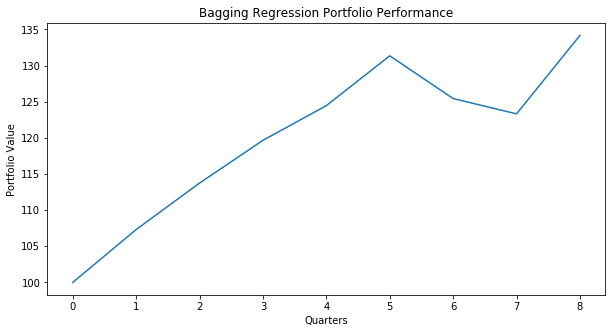

In [14]:
total_performance(8,Predictions,labels_df)

In [19]:
Predictions.to_csv('./Labels_and_Preds/Predictions_Bagging.csv')

# Running Bagging Regression on Feature Selection

In [11]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

f_all_preds = {}
f_all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./All_Data/feature_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels = Bagging_regression(df)
        #preds = np.reshape(preds,(8,))
        f_all_preds[str(filenames[i])] = preds
        f_all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


Quarter :1	 Result :6.48465736732876 %
Quarter :2	 Result :9.705802690190641 %
Quarter :3	 Result :5.465300066362957 %
Quarter :4	 Result :1.7439472321238725 %
Quarter :5	 Result :5.062158355738286 %
Quarter :6	 Result :-5.411014817921789 %
Quarter :7	 Result :-2.962904763578701 %
Quarter :8	 Result :8.179958022961552 %
Compounded Result :30.76944877376826 %
Quarterly Compounded Growth Rate : 3.4101782275015147 %
Annual Compounded Growth Rate : 14.354470299052258 %
Sharpe Ratio : 1.3644977986348954


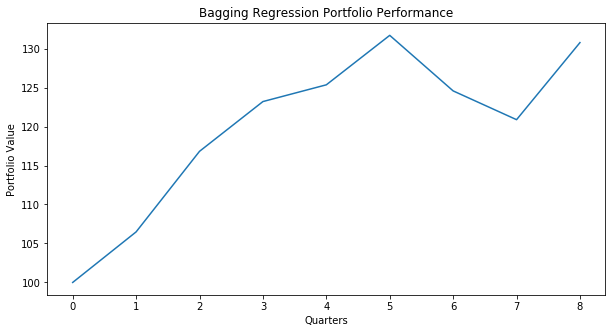

In [15]:
f_Predictions = pd.DataFrame.from_dict(f_all_preds, orient='index')
total_performance(8,f_Predictions,labels_df)

In [16]:
f_Predictions.to_csv('./All_Data/Labels_and_Preds/f_Predictions_Bagging.csv')

# Running it on standarized set

In [30]:
features_to_select = open('features.txt','r').read()
features_to_select = features_to_select.split('\n')[:-1]

filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

standard_all_preds = {}
standard_all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df1 = pd.read_csv("./All_Data/new_clean_data_v2/"+str(filenames[i]), delimiter = ',')
        df1.set_index("Unnamed: 0", inplace =True)
        df1 = df1.drop(columns = ['Current Assets','Current Liabilities','Current ratio'])
        df1 = df1[features_to_select]
        
        preds,labels = Bagging_regression(df1)
        
        #preds = np.reshape(preds,(8,))
        
        standard_all_preds[str(filenames[i])] = preds
        standard_all_labels[str(filenames[i])] = labels
    
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Quarter :1	 Result :5.976176511105322 %
Quarter :2	 Result :4.8997037288673795 %
Quarter :3	 Result :4.87166961639101 %
Quarter :4	 Result :4.154491614637065 %
Quarter :5	 Result :3.545808377828858 %
Quarter :6	 Result :-5.7500690530055465 %
Quarter :7	 Result :-2.692012781279611 %
Quarter :8	 Result :7.892326077573747 %
Compounded Result :24.414587310065144 %
Quarterly Compounded Growth Rate : 2.7682385833644796 %
Annual Compounded Growth Rate : 11.541287113815013 %
Sharpe Ratio : 1.2771216690810006


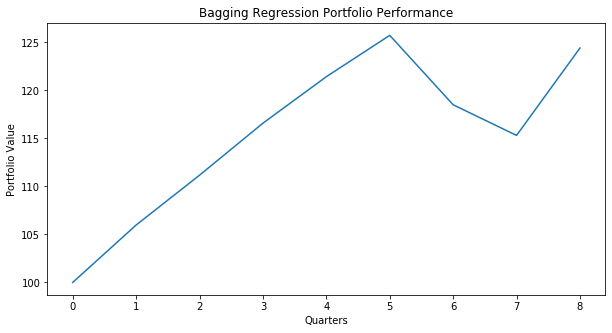

In [31]:
standard_Predictions = pd.DataFrame.from_dict(standard_all_preds, orient='index')
standard_labels_df = pd.DataFrame.from_dict(standard_all_labels, orient='index')
total_performance(8,standard_Predictions,standard_labels_df)

In [32]:
standard_Predictions.to_csv('./All_Data/Labels_and_Preds/standard_Predictions_Bagging.csv')

array([0.00442215, 0.01932958, 0.03122155, 0.02597187, 0.04300319,
       0.02034234, 0.03910428, 0.04451368])